In [102]:
%matplotlib inline
!pip3 install seaborn
!pip3 install pandas
!pip3 install sklearn
!pip3 install impyute
from sklearn.model_selection import StratifiedKFold
from impyute.imputation.cs import mice
import pandas as pd
import impyute as im
from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [126]:
import numpy as np

In [127]:
dm=pd.read_csv("~/Downloads/Assignment_BLR/kidneyChronic.csv")

In [128]:
print(dm.head())

  age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0  48  80   1.02  1  0       ?    normal  notpresent  notpresent  121  ...   
1   7  50   1.02  4  0       ?    normal  notpresent  notpresent    ?  ...   
2  62  80   1.01  2  3  normal    normal  notpresent  notpresent  423  ...   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4  51  80   1.01  2  0  normal    normal  notpresent  notpresent  106  ...   

  pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  
0  44  7800  5.2  yes  yes  no  good   no   no   ckd  
1  38  6000    ?   no   no  no  good   no   no   ckd  
2  31  7500    ?   no  yes  no  poor   no  yes   ckd  
3  32  6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  35  7300  4.6   no   no  no  good   no   no   ckd  

[5 rows x 25 columns]


In [129]:
dictonary = {
        "rbc": {"abnormal":1,"normal": 0,},
        "pc":{"abnormal":1,"normal": 0,},
        "pcc":{"present":1,"notpresent":0,},
        "ba":{"notpresent":0,"present": 1,},
        "htn":{"yes":1,"no": 0,},
        "dm":{"yes":1,"no":0,"\tno":0,"\tyes":1},
        "cad":{"yes":1,"no": 0,"\tno":0,},
        "appet":{"good":1,"poor": 0,},
        "pe":{"yes":1,"no":0,},
        "ane":{"yes":1,"no":0,},
        "class":{"ckd":1,"notckd":0,}
}
dm=dm.replace(dictonary)

In [130]:

dm['rbc']=pd.to_numeric(dm['rbc'],errors='coerce').astype(np.float64)
dm['pc']=pd.to_numeric(dm['pc'],errors='coerce').astype(np.float64)
dm['pcc']=pd.to_numeric(dm['pcc'],errors='coerce').astype(np.float64)
dm['ba']=pd.to_numeric(dm['ba'],errors='coerce').astype(np.float64)
dm['htn']=pd.to_numeric(dm['htn'],errors='coerce').astype(np.float64)
dm['dm']=pd.to_numeric(dm['dm'],errors='coerce').astype(np.float64)

dm['cad']=pd.to_numeric(dm['cad'],errors='coerce').astype(np.float64)
dm['appet']=pd.to_numeric(dm['appet'],errors='coerce').astype(np.float64)
dm['pe']=pd.to_numeric(dm['pe'],errors='coerce').astype(np.float64)
dm['ane']=pd.to_numeric(dm['ane'],errors='coerce').astype(np.float64)

dm['age']=pd.to_numeric(dm['age'],errors='coerce').astype(np.float64)
dm['bp']=pd.to_numeric(dm['bp'],errors='coerce').astype(np.float64)
dm['sg']=pd.to_numeric(dm['sg'],errors='coerce').astype(np.float64)
dm['al']=pd.to_numeric(dm['al'],errors='coerce').astype(np.float64)
dm['su']=pd.to_numeric(dm['su'],errors='coerce').astype(np.float64)
dm['bgr']=pd.to_numeric(dm['bgr'],errors='coerce').astype(np.float64)
dm['bu']=pd.to_numeric(dm['bu'],errors='coerce').astype(np.float64)
dm['sc']=pd.to_numeric(dm['sc'],errors='coerce').astype(np.float64)
dm['sod']=pd.to_numeric(dm['sod'],errors='coerce').astype(np.float64)
dm['pot']=pd.to_numeric(dm['pot'],errors='coerce').astype(np.float64)
dm['hemo']=pd.to_numeric(dm['hemo'],errors='coerce').astype(np.float64)
dm['pcv']=pd.to_numeric(dm['pcv'],errors='coerce').astype(np.float64)
dm['wbcc']=pd.to_numeric(dm['wbcc'],errors='coerce').astype(np.float64)
dm['rbcc']=pd.to_numeric(dm['rbcc'],errors='coerce').astype(np.float64)
import sys
from impyute.imputation.cs import fast_knn
sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
imputed_training=fast_knn(dm, k=30)
#imputed_training= mice(dm)


/usr/local/lib/python3.7/site-packages/impyute/util/preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


In [165]:
def drawAucRoc(classifier,X,y):
    
    i = 0
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i in range(6):
        X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20)
        classifier.fit(X_train,y_train)
        pred=classifier.predict(X_test)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, pred)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        i = i+1
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()     

In [132]:
dm=imputed_training
print(dm.index)

RangeIndex(start=0, stop=400, step=1)


In [133]:
X=dm.loc[:, 0:23]
Y=dm[24]

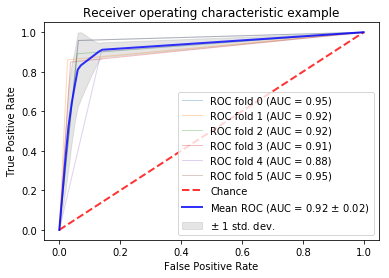

In [166]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(min_samples_leaf=.1,random_state=42, criterion="entropy", max_depth=2)
drawAucRoc( classifier,X,Y)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

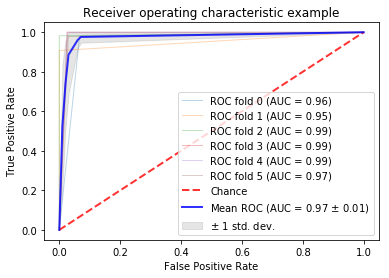

In [162]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
drawAucRoc( classifier,X,Y)

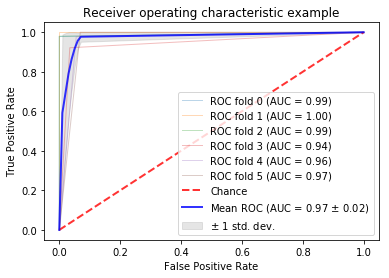

In [167]:
#from matplotlib import pyplot
#from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=80,min_samples_leaf=0.10)
#cv = StratifiedKFold(n_splits=6)
drawAucRoc( classifier,X,Y)
#X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.80,random_state=42)
#rf=RandomForestClassifier(n_estimators=80,min_samples_leaf=0.10,random_state=42)

#rf.fit(X_train,y_train)
#pred=rf.predict(X_test)
#print(classification_report(y_test,pred))
#print("Accuracy of the given model is : {}".format(accuracy_score(y_test,pred)))



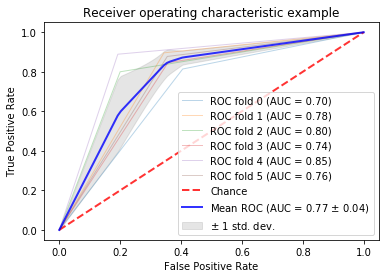

In [168]:
from sklearn.svm import SVC
classifier = SVC(gamma=.0001)
drawAucRoc( classifier,X,Y)